In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
data = pd.read_csv("wdbc.dataset",header=None)

#
## Dropping the id column from the dataset.
#
data=data.drop([0],axis=1)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
column_names=[]
for i in range(1,32):
    column_names.append("Column"+str(i))

data.columns = column_names
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
#
## Changing the value of M = 1 and B = 0 in the dataset
#
data.Column1=pd.Series(np.where(data.Column1.values == 'M', 1, 0),data.index)
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
#
## Splitting the data into training set, validation set and test set.
#

data_train, data_test = train_test_split(data, train_size=0.8, test_size=0.2, random_state=7)
data_test,data_validate = train_test_split(data_test,train_size=0.5,test_size=0.5,random_state=7)

#
## Splitting vertically the label column and the rest of the features for all the set.
#
data_train_label = np.array(data_train.iloc[:,0:1])
data_train_x = np.array(data_train.iloc[:,1:])

data_test_label = np.array(data_test.iloc[:,0:1])
data_test_x = np.array(data_test.iloc[:,1:])

data_validate_label = np.array(data_validate.iloc[:,0:1])
data_validate_x = np.array(data_validate.iloc[:,1:])

In [32]:
data_train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31
40,1,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.020310,0.1784,...,15.93,30.25,102.50,787.9,0.1094,0.20430,0.20850,0.11120,0.2994,0.07146
375,0,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,...,16.97,19.14,113.10,861.5,0.1235,0.25500,0.21140,0.12510,0.3153,0.08960
159,0,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,0.1442,...,12.36,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685
278,0,13.59,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.012380,0.1573,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
303,0,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.017800,0.1482,...,11.06,24.54,70.76,375.4,0.1413,0.10440,0.08423,0.06528,0.2213,0.07842


In [33]:
data_train.shape

(455, 31)

In [34]:
data_validate.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31
191,0,12.77,21.41,82.02,507.4,0.08749,0.06601,0.03112,0.02864,0.1694,...,13.75,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871
258,1,15.66,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,...,19.85,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190
244,1,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.20490,0.08886,0.1978,...,21.65,30.53,144.90,1417.0,0.14630,0.29680,0.34580,0.15640,0.2920,0.07614
521,1,24.63,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,0.1991,...,29.92,26.93,205.70,2642.0,0.13420,0.41880,0.46580,0.24750,0.3157,0.09671
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.52,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090


In [35]:
data_validate.shape

(57, 31)

In [36]:
data_test.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31
548,0,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,...,10.93,25.59,69.10,364.2,0.1199,0.09546,0.09350,0.03846,0.2552,0.07920
336,0,12.990,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.020980,0.1652,...,13.72,16.91,87.38,576.0,0.1142,0.19750,0.14500,0.05850,0.2432,0.10090
22,1,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.097560,0.2521,...,18.07,19.08,125.10,980.9,0.1390,0.59540,0.63050,0.23930,0.4667,0.09946
294,0,12.720,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.019240,0.1638,...,13.50,17.48,88.54,553.7,0.1298,0.14720,0.05233,0.06343,0.2369,0.06922
70,1,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.079510,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.26870,0.17890,0.2551,0.06589


In [37]:
data_test.shape

(57, 31)

In [38]:
print(data_validate_x)
data_test.shape
data_validate.shape

[[1.277e+01 2.141e+01 8.202e+01 ... 4.773e-02 2.179e-01 6.871e-02]
 [1.566e+01 2.320e+01 1.102e+02 ... 2.462e-01 3.277e-01 1.019e-01]
 [1.940e+01 2.350e+01 1.291e+02 ... 1.564e-01 2.920e-01 7.614e-02]
 ...
 [1.849e+01 1.752e+01 1.213e+02 ... 1.663e-01 2.510e-01 9.445e-02]
 [9.042e+00 1.890e+01 6.007e+01 ... 1.145e-01 3.135e-01 1.055e-01]
 [9.755e+00 2.820e+01 6.168e+01 ... 4.866e-02 2.321e-01 7.211e-02]]


(57, 31)

In [39]:
scaler = StandardScaler()
scaler.fit(data_train_x)

data_train_x = scaler.transform(data_train_x)
data_test_x = scaler.transform(data_test_x)
data_validate_x = scaler.transform(data_validate_x)

In [40]:
def true_or_false(h):
    '''Converts Probability into 0 class or 1 class.
       If h>=0.5 then class 1 is returned else 
       if h<0.5 class 0 is returned'''
    
    h_true_or_false=[]
    for i in h:
        if(i[0] >= 0.5):
            h_true_or_false.append(1)
        elif(i[0] < 0.5):
            h_true_or_false.append(0)
    return h_true_or_false

In [41]:
def loss_func(y,h):
    '''Computes the cost function'''
    j = ((y*(np.log(h)))+(1-y)*(np.log(1-h)))
    len_ = j.shape[0]
    j_theta = -np.sum(j)/len_
    return j_theta

In [42]:
# h = Activation function/hypothesis
# data_train_label = y/ output labels
# data_train_x = attribute matrix of training data
def update_weights(h,data_train_label,data_train_x,weights_array,learning_rate,bias):
    ''' Calculates gradients and update weights and bias'''
    m = data_train_x.shape[1]
    
    derivate_weight = np.dot(np.transpose(data_train_x),(h-data_train_label)) / m
    derivate_bias = np.sum(h-data_train_label) / m
    #print(derivate_weight.shape)
    #print(derivate_bias.shape)
    #print(weights_array.shape)
    weights_array = weights_array - learning_rate * derivate_weight
    #print(weights_array.shape)
    bias = bias - learning_rate * derivate_bias
    
    return {"updated weights": weights_array,"updated bias": bias}

In [43]:
#
## Hyperparameter tuning for different learning rates
#


learning_rates=[0.00012,0.0008,0.00005,0.00001]
validation_hyperparameters_result = []
training_hyperparameters_result = []
ctr=0
for lr in learning_rates:
    print(lr)
    weights_array = np.zeros((30,1),dtype=int)
    bias = 1
    losses=[]
    validation_result=[]
    accuracy_training_data=[]
    accuracy_validation_data=[]
    validation_hyperparameters_result.append([])
    training_hyperparameters_result.append([])
    for epoch in range(10000):
        data_train_x_transpose = np.transpose(data_train_x)
        weights_array_transpose=np.transpose(weights_array)
        data_validate_x_transpose = np.transpose(data_validate_x)
    
        z=np.matmul(weights_array_transpose,data_train_x_transpose)+bias
        h=1/(1+np.exp(-z))
        h = np.transpose(h)
        training_hyperparameters_result[ctr].append(loss_func(data_train_label,h))
#         h_tof = true_or_false(h)
#         accuracy_training_data.append(accuracy_score(data_train_label,h_tof))
    
        z1=np.matmul(weights_array_transpose,data_validate_x_transpose)+bias
        h1=1/(1+np.exp(-z1))
        h1 = np.transpose(h1)
        validation_hyperparameters_result[ctr].append(loss_func(data_validate_label,h1))
#         h1_tof = true_or_false(h1)
#         accuracy_validation_data.append(accuracy_score(data_validate_label,h1_tof))
    
#         if(epoch % 500 == 0):
#            print(losses[epoch])

        updated_values = update_weights(h,data_train_label,data_train_x,weights_array,lr,bias)
        weights_array = updated_values["updated weights"]
        bias = updated_values["updated bias"]
        weights_array.shape
    print(validation_hyperparameters_result[ctr][0:5])
    ctr+=1

0.00012
[0.9448406348866438, 0.9406655453971646, 0.9365261047496205, 0.9324218711864318, 0.9283524085909345]
0.0008


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


[0.9448406348866438, 0.9173372056524561, 0.8913568532167739, 0.8667770477781517, 0.8434870084903738]
5e-05
[0.9448406348866438, 0.9430988743719168, 0.941363327893911, 0.9396339633060224, 0.9379107486291861]
1e-05
[0.9448406348866438, 0.9444920380029597, 0.9441436902531496, 0.9437955913791862, 0.9434477411233073]


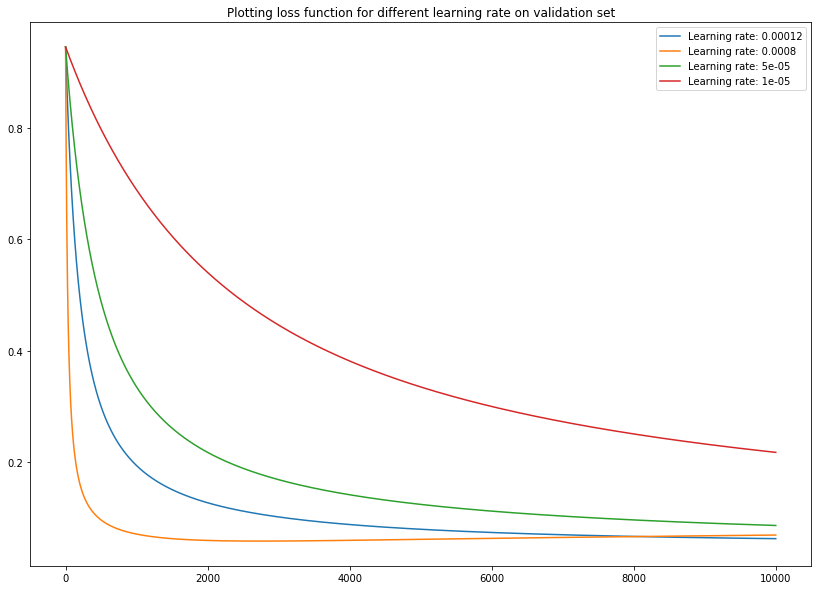

In [44]:
plt.figure(figsize=(14,10))
plt.title("Plotting loss function for different learning rate on validation set")
c=0
for x in validation_hyperparameters_result:
    plt.plot(x,label = "Learning rate: "+str(learning_rates[c]))
    c+=1
plt.legend()

##### From the above graph we can conclude that 0.00012 best fits our data and thus it is choosen for our final model.

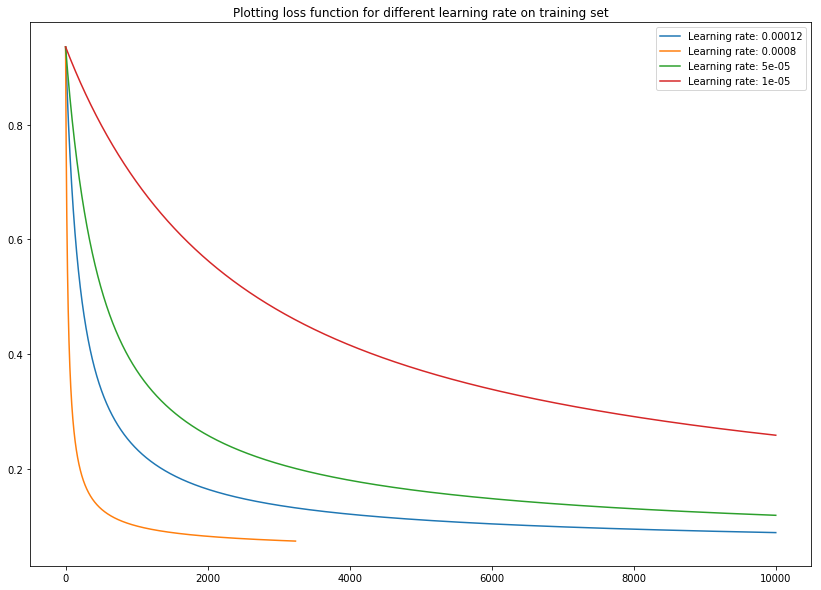

In [45]:
plt.figure(figsize=(14,10))
plt.title("Plotting loss function for different learning rate on training set")
c=0
for y in training_hyperparameters_result:
    plt.plot(y, label = "Learning rate: "+str(learning_rates[c]))
    c+=1
plt.legend()

#### By choosing the best learning rate through hyperparameter tuning we are training the logistic regression model and evaluating the performance on training and validation data through different evaluation metrics such as recall, precision and accuracy.

In [46]:
weights_array = np.zeros((30,1),dtype=int)
bias = 1
learning_rate=0.00012
losses=[]
validation_result=[]
accuracy_training_data=[]
accuracy_validation_data=[]
for epoch in range(10000):
    data_train_x_transpose = np.transpose(data_train_x)
    weights_array_transpose=np.transpose(weights_array)
    data_validate_x_transpose = np.transpose(data_validate_x)
    
    z=np.matmul(weights_array_transpose,data_train_x_transpose)+bias
    h=1/(1+np.exp(-z))
    h = np.transpose(h)
    losses.append(loss_func(data_train_label,h))
    h_tof = true_or_false(h)
    accuracy_training_data.append(accuracy_score(data_train_label,h_tof))
    
    
    
    z1=np.matmul(weights_array_transpose,data_validate_x_transpose)+bias
    h1=1/(1+np.exp(-z1))
    h1 = np.transpose(h1)
    validation_result.append(loss_func(data_validate_label,h1))
    h1_tof = true_or_false(h1)
    accuracy_validation_data.append(accuracy_score(data_validate_label,h1_tof))
    
    if(epoch % 500 == 0):
       print(losses[epoch])

    updated_values = update_weights(h,data_train_label,data_train_x,weights_array,learning_rate,bias)
    weights_array = updated_values["updated weights"]
    bias = updated_values["updated bias"]
    weights_array.shape

0.9352397094962447
0.3386510525491287
0.23496584861950712
0.19027140088188935
0.16489013242021694
0.1484113833558571
0.1367834234522287
0.12809630406392514
0.12133230530559397
0.11589854827366246
0.11142544638288795
0.10767011342843888
0.10446605561868891
0.10169515503306266
0.0992711889631187
0.0971296843990492
0.095221428969634
0.09350818313480128
0.0919597663200391
0.09055202785090989


In [47]:
# For Training data

weights_array_transpose = np.transpose(weights_array)
z2=np.matmul(weights_array_transpose,data_train_x_transpose)+bias
h2=1/(1+np.exp(-z2))
h2 = np.transpose(h2)
h2_tof = true_or_false(h2)

ps_train=precision_score(data_train_label, h2_tof)
print(ps_train)
recall_train = recall_score(data_train_label, h2_tof)
print(recall_train)
f1_train=f1_score(data_train_label, h2_tof)
print(f1_train)

0.9823529411764705
0.9709302325581395
0.9766081871345028


#### Precision, Recall and Accuracy score for Training data

In [48]:
cr = classification_report(data_train_label,h2_tof,target_names=['Benign','Malignant'])
print("                 Training set    \n")
print(cr)
accuracy_training = accuracy_score(data_train_label,h2_tof)
print('\n\nAccuracy for training data: '+str(accuracy_training))

                 Training set    

             precision    recall  f1-score   support

     Benign       0.98      0.99      0.99       283
  Malignant       0.98      0.97      0.98       172

avg / total       0.98      0.98      0.98       455



Accuracy for training data: 0.9824175824175824


In [49]:
# For Validation data

data_validate_x_transpose = np.transpose(data_validate_x)
z3=np.matmul(weights_array_transpose,data_validate_x_transpose)+bias
h3=1/(1+np.exp(-z3))
h3 = np.transpose(h3)
h3_tof = true_or_false(h3)

ps_validate=precision_score(data_validate_label, h3_tof)
print(ps_validate)
recall_validate = recall_score(data_validate_label, h3_tof)
print(recall_validate)
f1_validate=f1_score(data_validate_label, h3_tof)
print(f1_validate)


1.0
1.0
1.0


#### Precision, Recall and Accuracy score for Validation data

In [50]:
cr1 = classification_report(data_validate_label,h3_tof,target_names=['Benign','Malignant'])
print("                 Validation set    \n")
print(cr1)
accuracy_validate = accuracy_score(data_validate_label, h3_tof)
print("\n\nAccuracy for validation data: "+str(accuracy_validate))

                 Validation set    

             precision    recall  f1-score   support

     Benign       1.00      1.00      1.00        36
  Malignant       1.00      1.00      1.00        21

avg / total       1.00      1.00      1.00        57



Accuracy for validation data: 1.0


In [51]:
# For Test data

data_test_x_transpose = np.transpose(data_test_x)
z4=np.matmul(weights_array_transpose,data_test_x_transpose)+bias
h4=1/(1+np.exp(-z4))
h4 = np.transpose(h4)
h4_tof = true_or_false(h4)

ps_test=precision_score(data_test_label, h4_tof)
print(ps_test)
recall_test = recall_score(data_test_label, h4_tof)
print(recall_test)
f1_test=f1_score(data_test_label, h4_tof)
print(f1_test)


1.0
0.8947368421052632
0.9444444444444444


#### Precision, Recall and Accuracy score for Test data

In [52]:
cr2 = classification_report(data_test_label,h4_tof,target_names=['Benign','Malignant'])
print("                 Test set    \n")
print(cr2)
accuracy_test = accuracy_score(data_test_label,h4_tof)
print("\n\nAccuracy for test data: "+str(accuracy_test))

                 Test set    

             precision    recall  f1-score   support

     Benign       0.95      1.00      0.97        38
  Malignant       1.00      0.89      0.94        19

avg / total       0.97      0.96      0.96        57



Accuracy for test data: 0.9649122807017544


#### Loss function for training and validation data. Since the curve for training data is greater than the curve for validation data, we can conclude that the model is not overfitting.

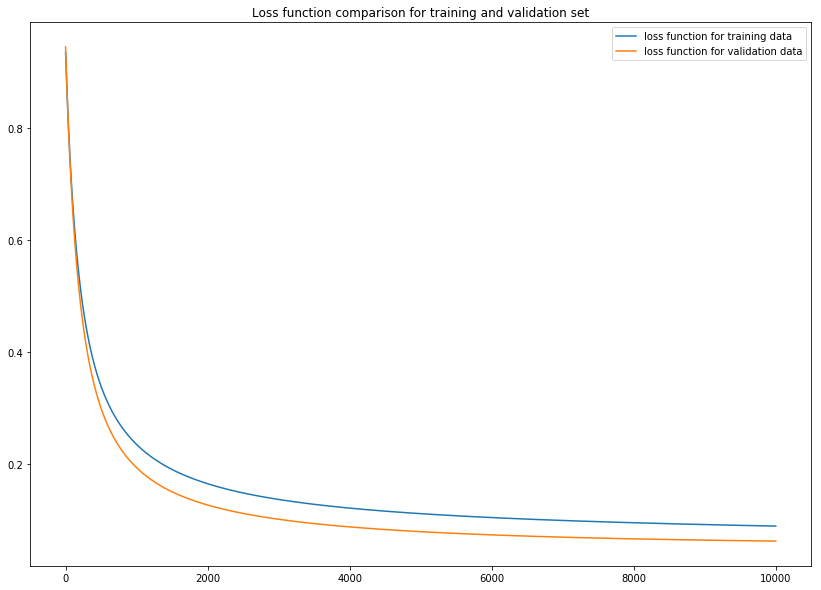

In [53]:
plt.figure(figsize=(14,10))
plt.title("Loss function comparison for training and validation set")
plt.plot(losses, label = "loss function for training data")
plt.plot(validation_result, label = "loss function for validation data")
plt.legend()

#### Accuracy score for validation and training data. We can see that the validation accuracy is more than the training accuracy, and this supports our claim that the model is not overfitting

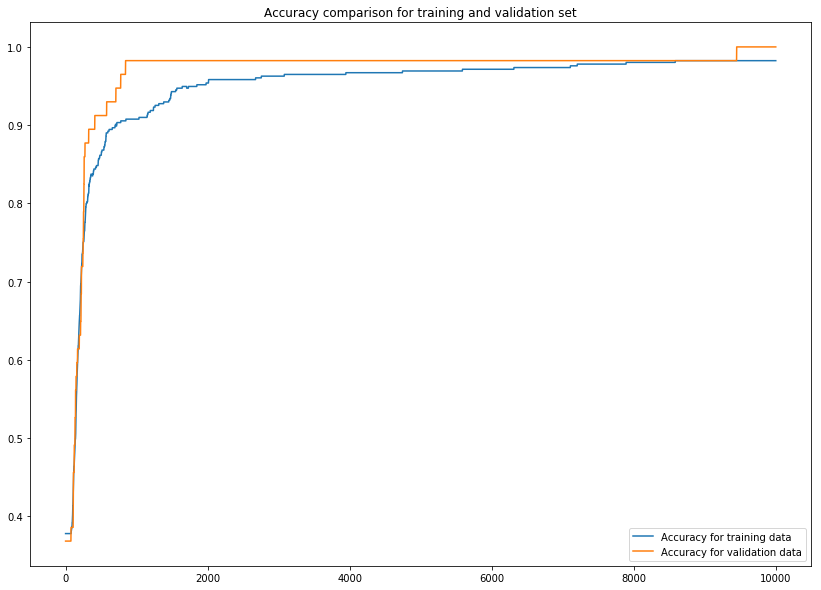

In [54]:
plt.figure(figsize=(14,10))
plt.title("Accuracy comparison for training and validation set")
plt.plot(accuracy_training_data, label = "Accuracy for training data")
plt.plot(accuracy_validation_data, label = "Accuracy for validation data")
plt.legend(loc="lower right")